In [1]:
import matplotlib.pyplot as plt
import aplpy
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import math as m
import scipy.optimize as opt
from matplotlib.colors import LogNorm
import matplotlib

In [2]:
##plotting using aplpy
#var_Q = aplpy.FITSfigure('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_Q.fits')
#var_Q.show_grayscale()

#var_U = aplpy.FITSfigure('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_U.fits')
#var_U.show_grayscale()

#ang = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_ang.fits')
#ang.show_grayscale()

#I = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_I.fits')
#I.show_grayscale()

#p = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_p.fits')
#p.show_grayscale()

#polint = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits')
#polint.show_grayscale()

#Q = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_Q.fits')
#Q.show_grayscale()

#S = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_S.fits')
#S.show_grayscale()

#s2n = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_s2n_polint.fits')
#s2n.show_grayscale()

#U = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_U.fits')
#U.show_grayscale()

#var_polint = aplpy.FITSFigure('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_var_polint.fits')
#var_polint.show_grayscale()

hill_data = fits.getdata('fits_files/VelaC_500_hill_regs_regrid_30as_pix.fits', ext = 0)
var_Q_data = fits.getdata('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_Q.fits', ext = 0)
var_U_data = fits.getdata('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_U.fits', ext = 0)
ang_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_ang.fits', ext=0)
I_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_I.fits', ext=0)
p_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_p.fits', ext=0)
polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits', ext = 0)
Q_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_Q.fits', ext=0)
S_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_S.fits', ext = 0)
s2n_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_s2n_polint.fits', ext = 0)
U_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_U.fits', ext = 0)
var_polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_var_polint.fits', ext=0)

In [3]:
mask = np.logical_and(hill_data>0, polint_data>3*np.sqrt(var_polint_data))
i_good = mask.nonzero()
#i_good_coord = np.transpose(np.nonzero(i_good))
p_good = p_data[i_good]

/var/folders/lp/bh247h21459_r2sf0dzyrx_w0000gn/T/ipykernel_42382/83382200.py:3: RuntimeWarning: invalid value encountered in arccos
  gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]


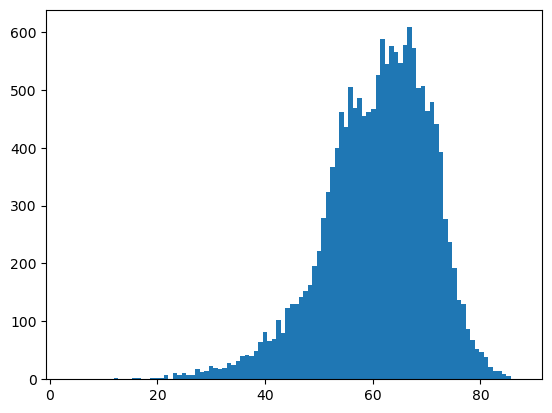

In [4]:
p_max = 0.15
p_0 = (3*p_max)/(3+p_max)
gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]
hist, bins, patches = plt.hist(gamma, 100)

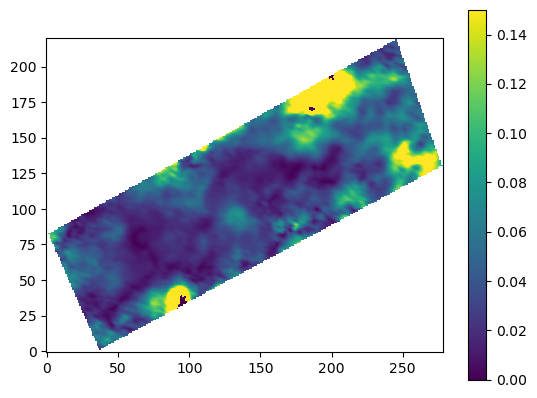

In [6]:
plt.imshow(p_data, vmin = 0.0 , vmax = 0.15)
plt.gca().invert_yaxis() 

cbar = plt.colorbar()

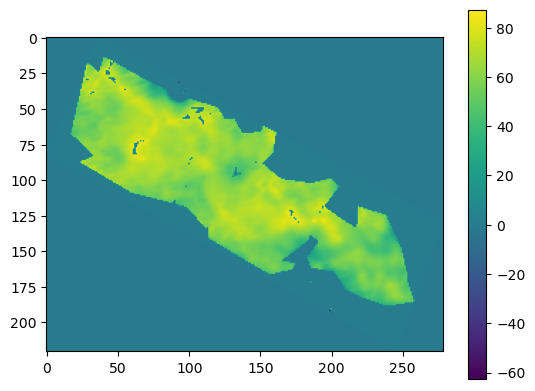

In [35]:
p_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_p.fits', ext=0)
gamma2d = p_data

for x in range(len(ti_good)):
    gamma2d[ti_good[x][0], ti_good[x][1]] = gamma[x]

gamma2d[np.isnan(gamma2d)] = 0

plt.gca().invert_yaxis()
plt.imshow(gamma2d)
cbar = plt.colorbar()

In [7]:
p_data[ti_good[0][0], ti_good[0][1]]

52.14262835597585

In [8]:
matplotlib.scale.get_scale_names()

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']

In [9]:
x, y = np.meshgrid(np.linspace(-5, 5, 10), 
                   np.linspace(-5, 5, 10))

u = gamma2d
v = x/(x**2 + y**2)